In [1]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from dnn import MultiLayerNet
#from dnn_extend import MultiLayerNet

In [2]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
hidden_list = [50,50] # hidden layer 개수 설정
network = MultiLayerNet(input_size=784, hidden_size_list = hidden_list, output_size=10)

#hyper-parameter 설정
iters_num = 10000
batch_size = 100
learning_rate = 0.1

# loss list 설정
train_loss_list = []
train_acc_list = []
test_acc_list = []

train_size = x_train.shape[0]
iter_per_epoch = max(train_size / batch_size, 1)

In [4]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 파라미터 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #손실함수 계산
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #epoch당 train, test 정학도 계산 및 출력
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("accuracy after iteration {0:} : train accuracy = {1:.4f},  test accuracy = {2:.4f}".format(i,train_acc, test_acc)) 
        
     

accuracy after iteration 0 : train accuracy = 0.1565,  test accuracy = 0.1614
accuracy after iteration 600 : train accuracy = 0.9238,  test accuracy = 0.9236
accuracy after iteration 1200 : train accuracy = 0.9409,  test accuracy = 0.9391
accuracy after iteration 1800 : train accuracy = 0.9498,  test accuracy = 0.9496
accuracy after iteration 2400 : train accuracy = 0.9566,  test accuracy = 0.9538
accuracy after iteration 3000 : train accuracy = 0.9601,  test accuracy = 0.9552
accuracy after iteration 3600 : train accuracy = 0.9635,  test accuracy = 0.9581
accuracy after iteration 4200 : train accuracy = 0.9692,  test accuracy = 0.9625
accuracy after iteration 4800 : train accuracy = 0.9689,  test accuracy = 0.9615
accuracy after iteration 5400 : train accuracy = 0.9702,  test accuracy = 0.9629
accuracy after iteration 6000 : train accuracy = 0.9744,  test accuracy = 0.9667
accuracy after iteration 6600 : train accuracy = 0.9769,  test accuracy = 0.9681
accuracy after iteration 7200 : 

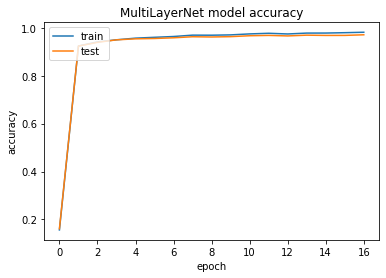

In [5]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.title('MultiLayerNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()